### [1]

### Importing the libraries:

In [26]:
import pandas as pd
import numpy as np
import json
import shutup 
shutup.please()

##### Description:

As a standard, I am importing the pandas, numpy, json and shutup libraries which are required for my computation purposes. 

Because this is a visualization step, I am importing the matplotlib, seaborn for visualization purposes. 

##### Libraries used for visualization: 
    matplotlib
    seaborn

##### Functions used for visualization:
Inbuilt function:
    hist
Seaborn function:
    histplot
    distplot

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### [2]

### Reading the file

In [4]:
df = pd.read_json("transactions.txt", lines = True)

In [53]:
pd.set_option('display.max_columns', None)

#### Refer to [2.1] from 'Question 1.ipynb' for additional information about reading the file.

### [3]

### Plotting the histograms

#### [3.1]

##### Base Histogram

**Method:** 

I am using the seaborn histplot for plotting the different transactionAmounts, with a change in different transaction types and compared with . With different sets of visualizations, is it clear that the data is much more understandable rather than just with the plot below. 

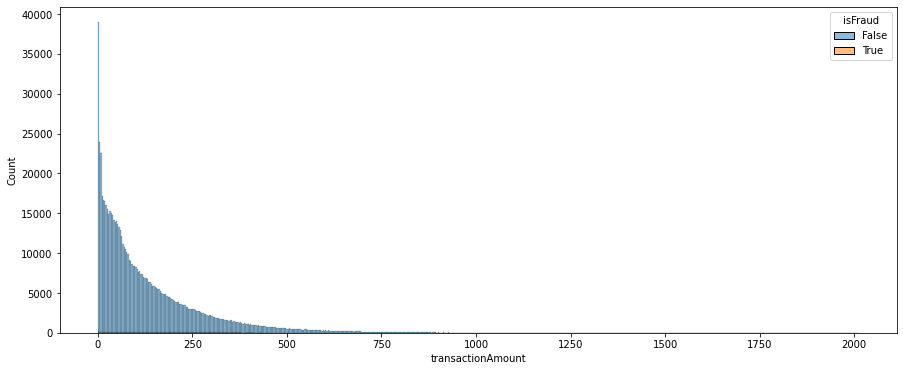

In [112]:
plt.figure(figsize = (15,6))
sns.histplot(data = df, x="transactionAmount", hue = "isFraud")
plt.show()

##### Description:

Plotting the histogram according to the transaction amount and assuming the isFraud column for an little understanding about the data

##### Insights:

Although there are a large number of 0 value purchases, which I believe as corresponding to ADDRESS_VERIFICATION. Let's plot for only the values that are of the transactionType = ADDRESS_VERIFICATION.  Because of the extremely undersampled data for True Fraud, it is harder to gather insights about Fraud from such a huge dataset.

#### [3.2]

##### Plotting for the address verification transaction type

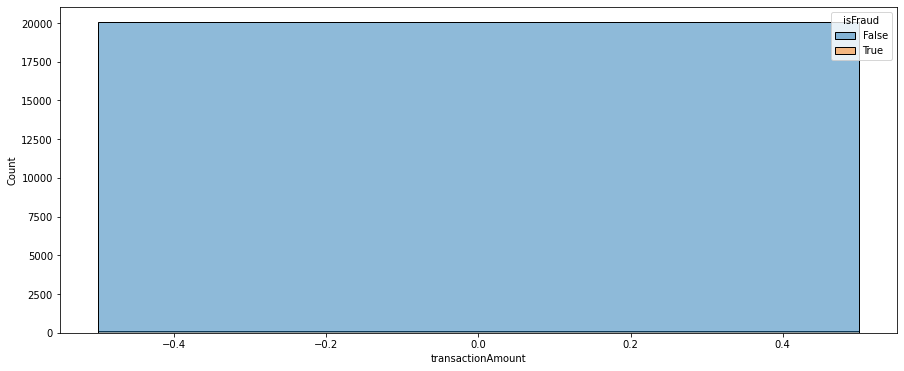

In [115]:
plt.figure(figsize = (15,6))
sns.histplot(data=df[df.transactionType=="ADDRESS_VERIFICATION"], x="transactionAmount", hue = "isFraud")
plt.show()

##### Insights

We can see that the ADDRESS_VERIFICATION is only corresponding to the the value of zero. These kind of transactions are only nothing but weeds in the dataset. 


##### Further Step:

Plotting the transaction amounts on the transaction Types of Purchase and Reversal. 

#### [3.3]

##### Plotting for the PURCHASE transaction type

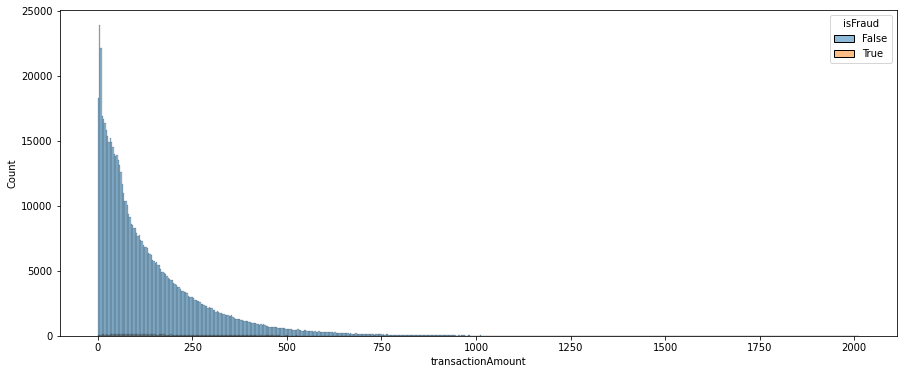

In [116]:
plt.figure(figsize = (15,6))
sns.histplot(data=df[df.transactionType=="PURCHASE"], x="transactionAmount", hue = "isFraud")
plt.show()

##### Insights

We can see that the there are a large number of transactions within the 0-100 range, and then, it gradually keeps on decreasing. There is an exponential decrease after the first few transaction amount.


##### Further Step:
Plotting the transaction amounts on the transaction Types of Reversal. 

#### [3.4]

##### Plotting for the REVERSAL transaction type

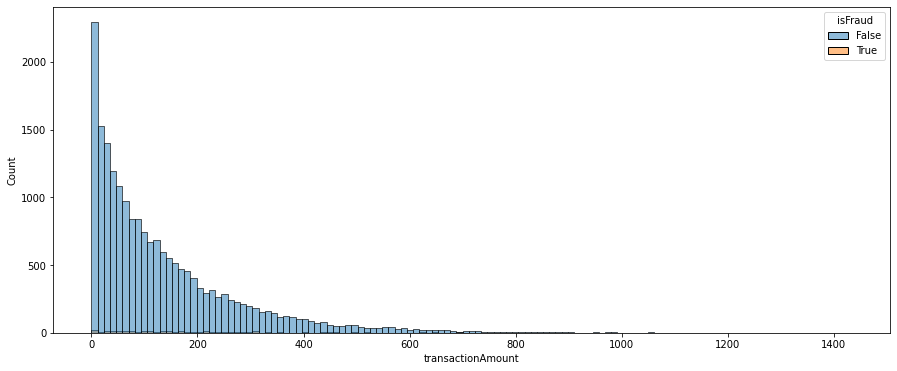

In [117]:
plt.figure(figsize = (15,6))
sns.histplot(data=df[df.transactionType=="REVERSAL"], x="transactionAmount", hue = "isFraud")
plt.show()

##### Insights:

If you can observe closely, there is slight darker area at the bottom, which represents the fraud in the Transanction.

Despite from our huge datasets, the credit limit being extremely high, we rarely observe any transactions in the higher level. This is very intruiging on how much cap is set for each Credit-Card or how much amount of purchase that a customer is willing to purchase with even a higher credit limit. 


##### Further work:

Plotting the PURCHASE and REVERSAL for transactions amounts that are less than 600 and observing only the fraudelent transactions.


#### [3.5]

##### Plotting the fraudelent transactions for purchases and reversals.



##### [3.5.1]
##### PURCHASE transactions which are fraudulent and also less than 600. 

**Method:**

Here I am using the conditional column method for the transactional amounts being less than 600, transactionTypes being PURCHASE and marking these only for the fraudulent transactions. 

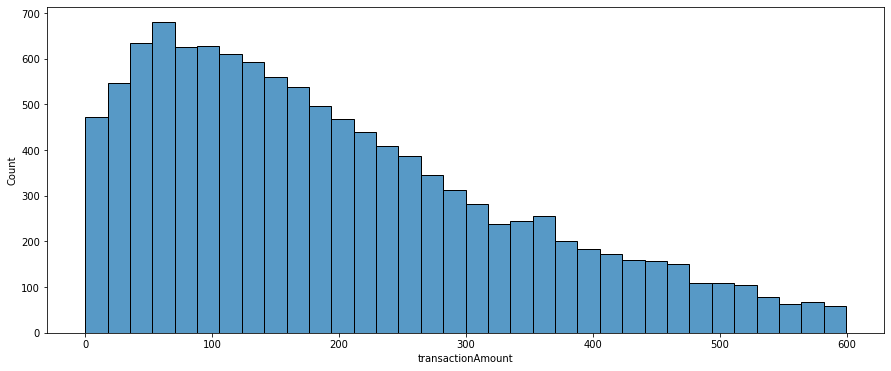

In [108]:
plt.figure(figsize = (15,6))
sns.histplot(data=df[(df.transactionAmount<=600) & (df.transactionType=="PURCHASE") & (df.isFraud==True)], x="transactionAmount")
plt.show()

##### Insights:

There are a lot of purchase type transactions in the lower amount range i.e. 50-300, and these tend to significantly decrease. I believe it is easier for the scammers to get make-believe the smaller transactions as opposed to the larger transactions.

##### Next steps:

Plotting the same fraudulent range transactions although for the reversal type of transactions

##### [3.5.2]
##### REVERSAL transactions which are fraudulent and also less than 600. 

**Method:**

Here I am using the conditional columns for the transactional amounts being less than 600, transactionTypes being REVERSAL and marking these only for the fraudulent transactions. 

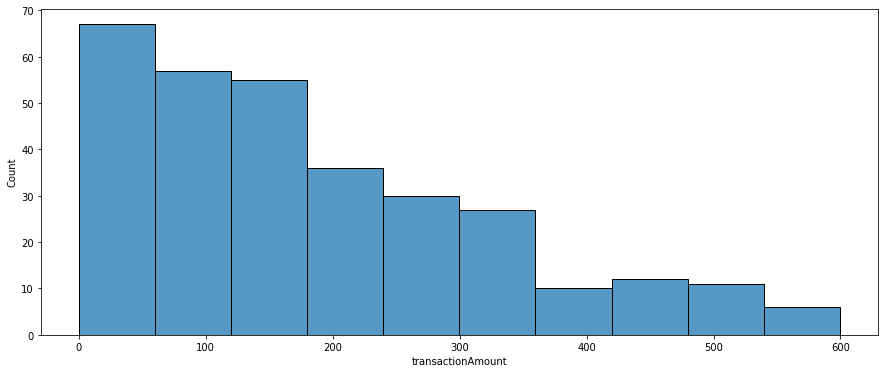

In [109]:
plt.figure(figsize = (15,6))
sns.histplot(data=df[(df.transactionAmount<=600) & (df.transactionType=="REVERSAL") & (df.isFraud==True)], x="transactionAmount")
plt.show()

##### [3.5.3]
##### "" (NULL) transactions which are fraudulent and also less than 600. 

This is an extra part for me to cover on how the transactions which are unknown are behaving and whether there are actually frauds which is more likely to happen on purchases and reversal. 



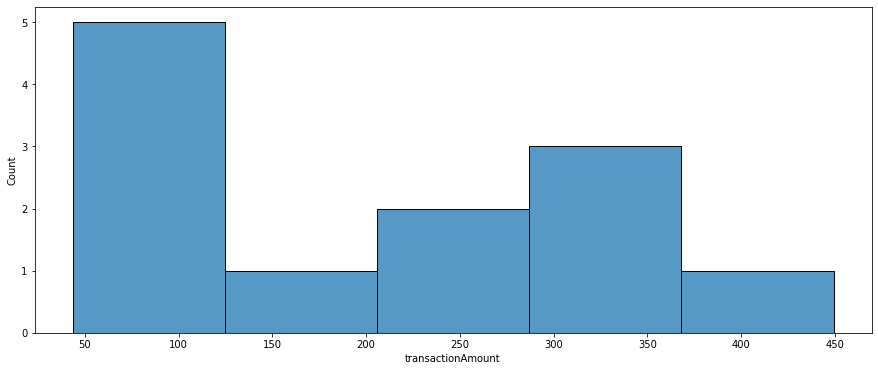

In [110]:
plt.figure(figsize = (15,6))
sns.histplot(data=df[(df.transactionAmount<=600) & (df.transactionType=="") & (df.isFraud==True)], x="transactionAmount")
plt.show()

##### Insights from the above:

We can see that the frauds are more likely to happen in the lower budget areas, atleast from the given data. To avoid these, we need to undertstand how frequently the scammers are trying to make fraudulent transactions. 

### [4]

### Final Insights and Conclusions:

There are a good number of frauduelent transactions happening in the 50-300 amount area and most of the scammers are prone to reflect the fraudulent transactions as a PURCHASE as opposed to the them being unknown. 

If we can come up with a strategy that focuses on the lower transaction amounts as opposed to that higher range transactions, if is possible that we can avoid a lot of frauds with the customers. 